In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


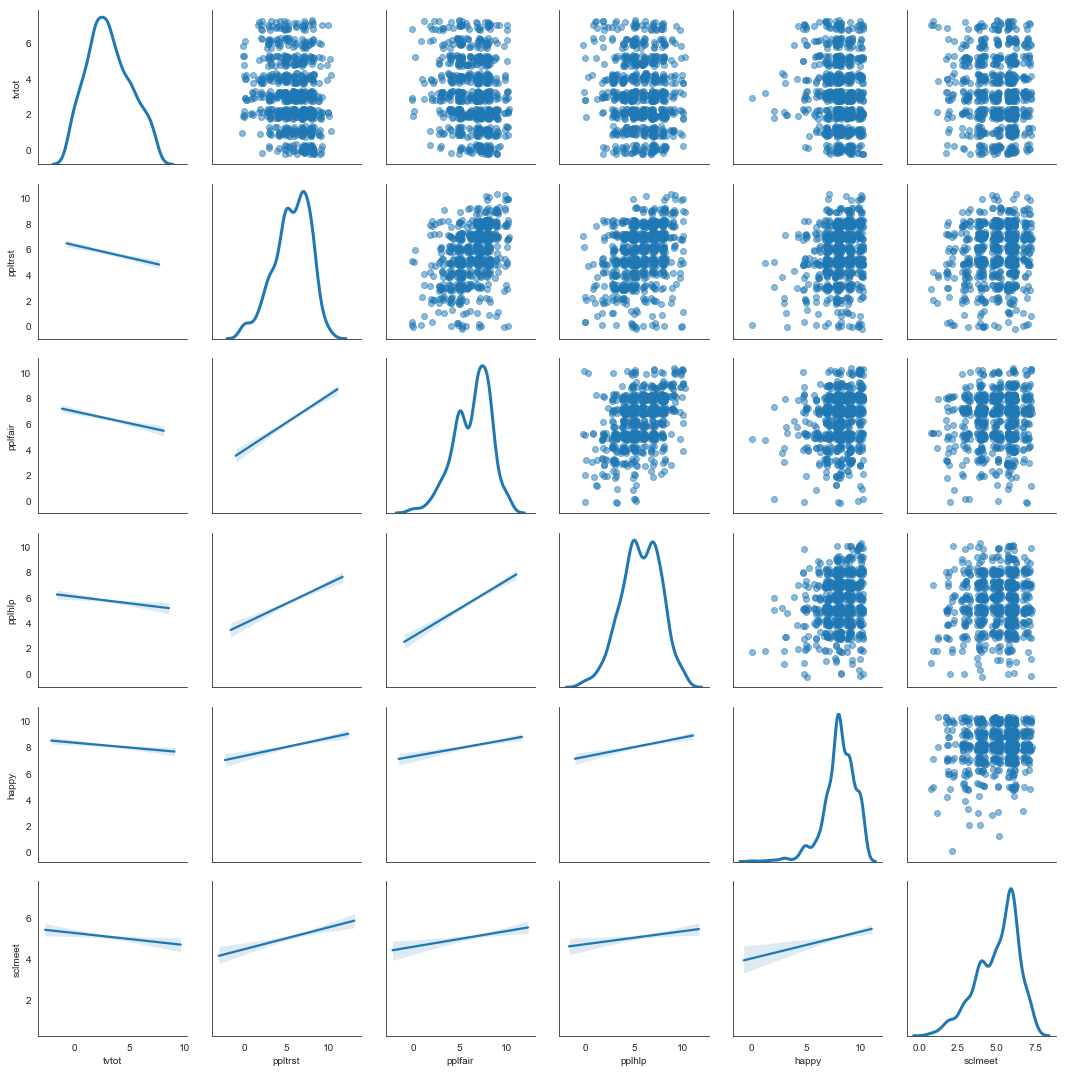

In [10]:
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


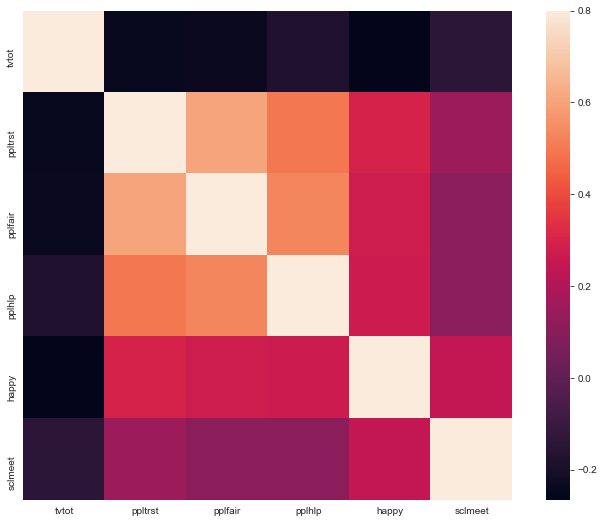

In [11]:
# Make the correlation matrix.
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


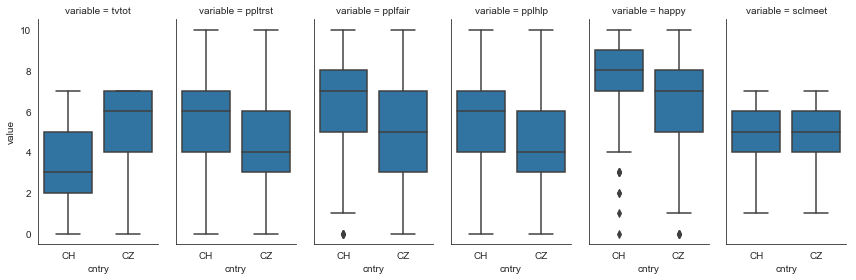

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.394029017549828e-27)
pplfair
Ttest_indRe

In [12]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

# Descriptive statistics by group.
print(df_czch.groupby('cntry').describe())

# Test whether group differences are significant.
for col in df_czch.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

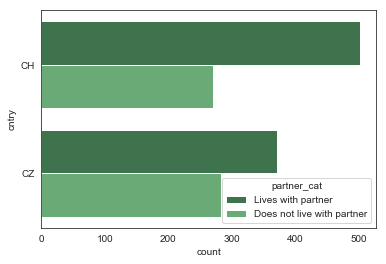

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


In [13]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry','partner']
]

# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

# Plot counts for each combination of levels.
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

In [ ]:
#BREAK

In [14]:
#BREAK

In [15]:
# BELOW IS FEATURE ENGINEERING USING SAME DATA SET

In [16]:
# Take a subset of the data to make plots clearer.
print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In [17]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


In [18]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

# Check to make sure it worked.
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


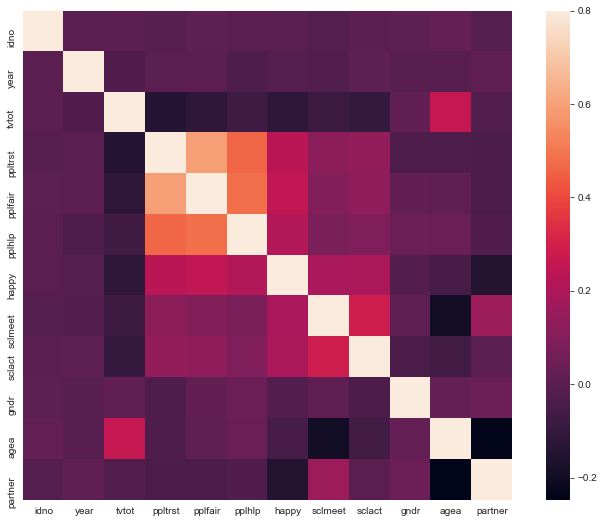

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


In [19]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Looks like 'pplfair','ppltrst' and 'pplhlp' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()

print(corrmat2)

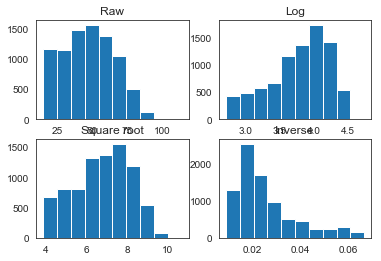

<Figure size 432x288 with 0 Axes>

In [21]:
#NON NORMALITY
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()

plt.tight_layout()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_age'] = np.log(df['agea'])

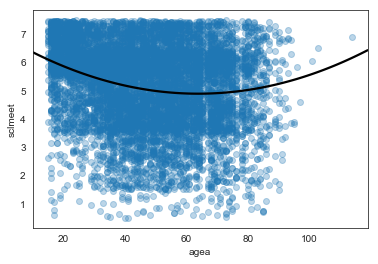

In [22]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['agea'] * df['agea']

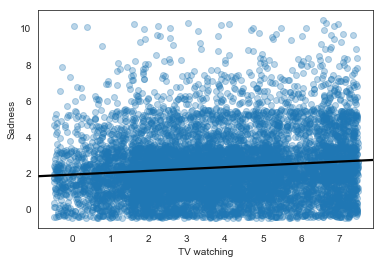

In [23]:
# Reverse-coding the 'happy' variable so that higher scores mean less
# happiness (and thus possibly more sadness).

features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

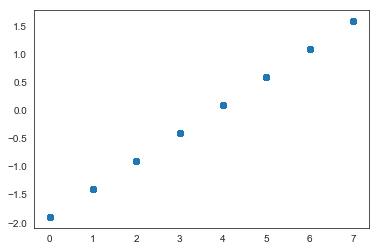

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -4.888824e-19 -2.645920e-15 -7.836428e-16 -7.257574e-15 -6.105886e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -8.793070e-17  2.377904e-15 -1.101365e-15 -2.058798e-15 -3.414477e-15   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [25]:
from sklearn import preprocessing
# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())